# Standvirtual Ad Listings IDs & URLs - Deep Dive

> Summary

The project with Standvirtual began in early October 2024 with an initial scrape of their website. Although some preliminary analysis was conducted using a single dataset of ad listings scraped during this period, the main goal was always to scrape the website on a predetermined schedule. This would create a unique dataset that could track trends and serve as a proxy for the new and used car market.

The weekly scrapes gathered general information about the ad listings. However, the scrapes were performed on pages containing lists of ads rather than on individual ad listings. Each page displayed approximately 50 ads, making it much faster to scrape than the detailed scraping of each individual ad—of which there are roughly 40-45k listings. Nonetheless, I was particularly interested in obtaining accurate car model data from Standvirtual for comparison with the model information derived from ad titles in my initial dataset.

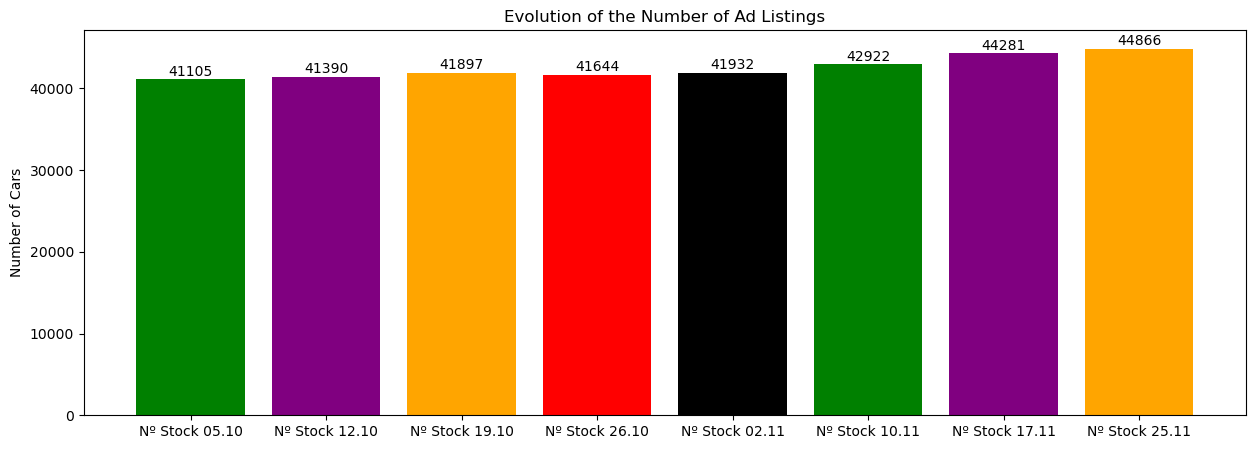
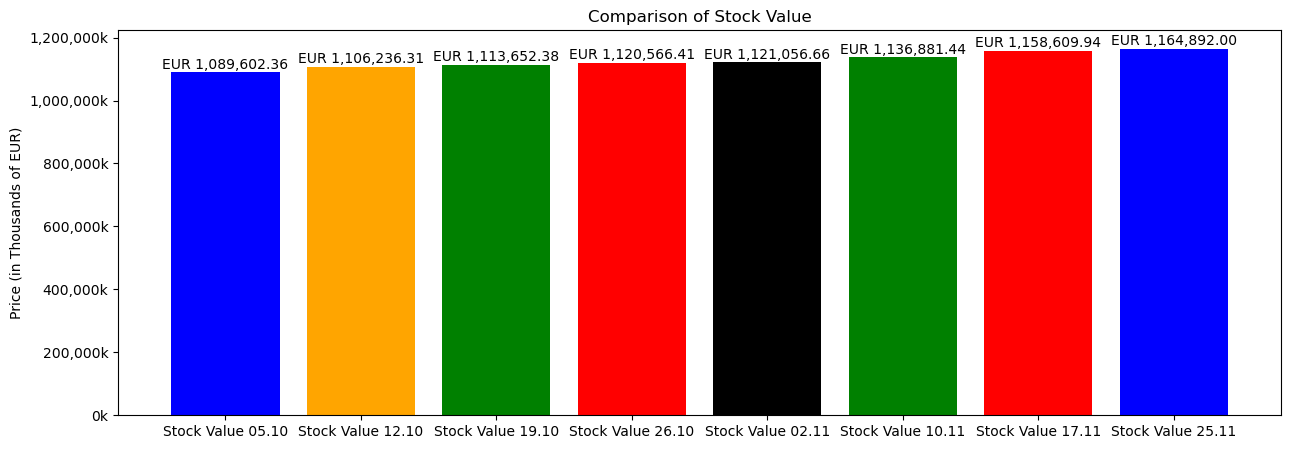
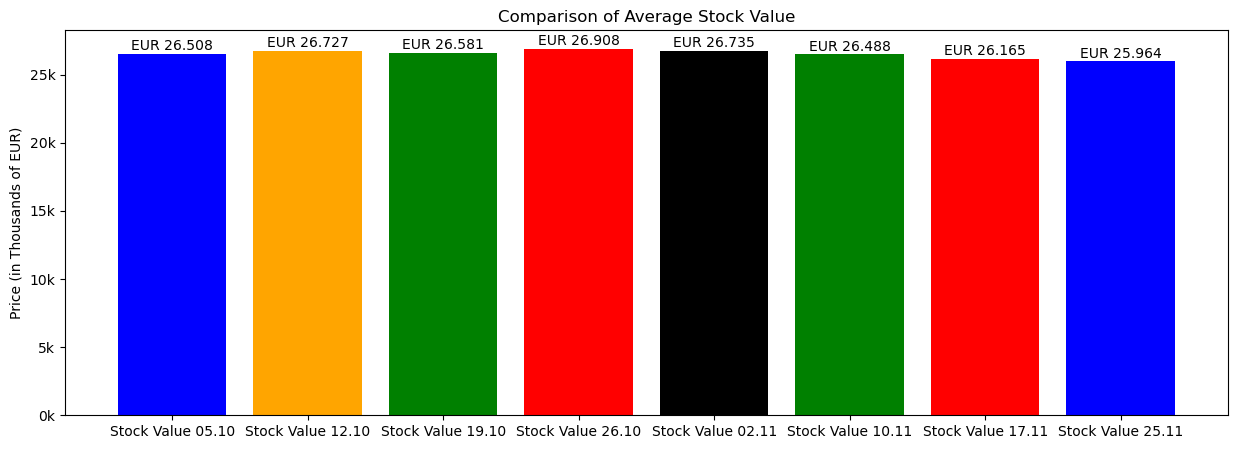

To capture more detailed data, I built a scraper for each individual ad listing. Using the URLs obtained from the main scrape, I retrieved information such as: (1) the model of the car, (2) the colour, (3) the ad ID, (4) the ad publication date and (5) seller information. Interestingly, the car model information derived from the ad titles was almost as accurate as Standvirtual’s model data. Unfortunantely, though, Standvirtual's car model details lacked granularity. For example, it did not differentiate between different variants of the Mercedes A-Class (e.g., A180d, A200, A45).

> Data Analysis

As I examined the scraped data more closely, I observed a pattern in the ad IDs. These IDs were unique 10-digit numbers, which appeared to follow a sequential order. However, the publication date was not as straightforward. Two different ads with distinct IDs sometimes had the same or very close publication dates.

By observation, I noticed that there seemed to be some sequentiality in the ad ID. Despite this, the ad publication date was not as clear. Two different ad listings, with very different IDs, could have the same or very close publication dates. What I then noticed by observation was that the ad publication date did not always correspond to the original publication date. If (1) the ad had been renewed (ads only last for a maximum of 28 days on Standvirtual) or (2) the ad had been edited after being published, the publication date would correspond to the date in which those things happened. 

I hypothesized that the publication date displayed on Standvirtual was not always the original publication date but rather the date the ad was renewed or edited. To test this, I calculated the correlation between the ad ID and publication date. Initially, I found a low correlation (0.14), which suggested that the publication date often did not represent the true original publication date. However, by focusing on a subset of ads that were likely not renewed or edited, I observed a higher correlation (0.29), such that the publication date on Standvirtual was more likely to be the original publication date. By simplifcation, and even though I knew I would catch some listings which had been renewed or edited, I filtered the subset by two different 4-digit numbers - these 4-digit numbers corresponded to the first 4-digits of the full 10-digit ID number. The correlation in this subset was 0.29. This confirmed that in many cases, the publication date on Standvirtual did not reflect the actual date the ad was first published and that the ad ID was sequential.

Next, I analyzed the URL format of the ads, which typically looked like this:
https://www.standvirtual.com/carros/anuncio/triumph-tr7-ID8Ppwag.html
Initially, it appeared to contain the brand and model followed by a string of random characters. However, I noticed that many URLs included the string “ID8P” in the latter part of the ID. Other URLs used different identifiers, such as “ID8Q.” This suggested a potential sequential pattern in the URL structure.

Further examination revealed that the last 8 characters of the URL consisted of: (1) numbers from 0 to 9 (2) lower case letters and (3) upper case letters. Each 8-string character seemed to cycle between firstly a number from 0 to 9, secondly lower case letters and lastly upper case letters. Thus, the 8-character string had 62 possible values (digits + lowercase + uppercase letters). To confirm this, I translated each 8-character string into a numeric value using a base-62 conversion process, assigning each character a value based on its position in the sequence. For example, the character "I" has a value of 44 (based on its position in the sequence).

The steps to convert that 8-string characters in a numeric value were as follows: each character has a position in the sequenece (where it shows up in the sequence). For example the "I" would be in position 44 (counting starts at 0). Then with this, for each character, I compute the value. For the first character "I" the value is (value × 62 + char_to_index[char]), or 0 x 62 + 44 = 44. For the second character "D" the value is 44 x 62 + 13. In the end, if we compute for each character, the value of this URL would be 157,174,340,598,564.

Using the string "ID8Ppwag," I converted each character into its base-62 value:

| Character | Value (Base-62 Index) | Position (from Right) | \( 62^Text_Position \) | Contribution to Total             |
|-----------|-----------------------|-----------------------|--------------------------|-----------------------------------|
| **I**     | 44                    | 7                     | \( 62^7 = 3,521,614,606,208 \) | \( 44 x 3,521,614,606,208 = 154,951,042,673,152 \) |
| **D**     | 39                    | 6                     | \( 62^6 = 56,800,235,584 \) | \( 39 x 56,800,235,584 = 2,215,209,187,776 \) |
| **8**     | 8                     | 5                     | \( 62^5 = 916,132,832 \)  | \( 8 x 916,132,832 = 7,329,062,656 \) |
| **P**     | 51                    | 4                     | \( 62^4 = 14,776,336 \)   | \( 51 x 14,776,336 = 753,593,136 \) |
| **p**     | 25                    | 3                     | \( 62^3 = 238,328 \)      | \( 25 x 238,328 = 5,958,200 \)|
| **w**     | 32                    | 2                     | \( 62^2 = 3844 \)         | \( 32 x 3844 = 123,008 \)     |
| **a**     | 10                    | 1                     | \( 62^1 = 62 \)           | \( 10 x 62 = 620 \)           |
| **g**     | 16                    | 0                     | \( 62^0 = 1 \)            | \( 16 x 1 = 16 \)             |

**157,174,340,598,564** = \( 16 + 620 + 123,008 + 5,958,200 + 753,593,136 + 7,329,062,656 + 2,215,209,187,776 + 154,951,042,673,152 \)

This numeric value of the URL was highly correlated with both the ad ID and publication date, showing that they were indeed sequential.

With the sequential nature of the ID numbers and URL values confirmed, I began refining my approach to estimating publication dates for the ad listings. This refinement was crucial for understanding: (1) how long cars were on sale for (2) what percentage of ads were getting renewed. This part was more tricky, below I will lay out the approach.

When I started, I knew that ID numbers beginning with #8094 first appeared in mid-November 2024. Using this baseline, I could extrapolate publication dates for other IDs. From my initial analysis, it seemed that ID numbers beginning with #8093 first appeared in July 2024, suggesting each cycle of a Left_4_ID lasted about four months. However, after reviewing more data, I noticed older Left_4_IDs (e.g. #8016, #8020) did not always fit this four-month pattern. I confirmed this discrepancy through real publication dates for these IDs, leading me to refine my approach.

To improve accuracy, I built a new formula to calculate months of difference between each ID and the base ID, #8094. This month difference depended on the first four digits of each ID number. The number of months for each first four digits is as per the table below:

| `left_4_id_int`       | `months_per_step` Value |
|--------------------------------|-------------------------|
| 8094                | 1                       |
| 8083 to 8093 | 4                       |
| 8002 to 8082 | 0.28                    |
| < 8002                 | 3.5                     |

Let’s consider an example where the ID number of an ad is 8088733792. The first four digits, 8088, indicate that we are in the second group, where the months_difference is 4 months. To estimate the publication date, we can follow these steps:(1) Calculate the difference in ID numbers: Subtract the first four digits of our ID (8088) from the base ID (8094). This gives a difference of 6. (2) Multiply by the months_difference: Multiply the difference (6) by the respective months_difference of 4 months. This results in 24 months. This step suggests that the ad was published 24 months before the first appearance of the #8094 ID. (3) Estimate the publication date: Since the first #8094 ID appeared on November 16, 2024, we subtract 24 months from this date. The estimated publication date would be November 27, 2022. Note: The estimate of 24 months is based on months, but for a more accurate calculation, it’s converted to days, which gives a more precise publication date.

Before attempting to refine the publication date further, I first converted the estimated publication date into a numerical value. I then calculated the correlation between this numerical date and both the ID number and the URL number. Both correlations returned a value of 0.65. Since the ID number and URL are already fully correlated, this result reinforces my hypothesis that the ID numbers are indeed sequential.

The next step was to refine the initial estimated publication date. To do this, I decided to ignore the first four digits of the ID number, which were already accounted for in the initial estimate, and focus on the remaining six digits. Analyzing the magnitude of this 6-digit number could provide further insight into the exact publication date.

Let’s take the ID 8088733792 as an example. The process for refining the estimated publication date follows these steps: (1) Remove the first four digits: The first four digits are 8088, leaving us with the remaining six digits: 733792. (2) Divide the six-digit number into blocks: There are 24.750 blocks. When we divide 733,792 by 24.750, we get approximately 29.648. Rounding down, we’re in block 29. (3) Calculate the position within block 29: The remainder of the division is 16.042, and when we divide 16.042 by 24.750, we find that we are 64.8% into block 29. (4) Convert the block percentage into days: The months_step for this ID is 4 months (as determined previously). Converting this to days: 4 months x 30 days = 120 days. (5) Adjust the date: To adjust for the position within block 29, we calculate: 120 days x 64.8% = 77.76 days. Adding 77 days to the initial estimated publication date gives us the final adjusted estimate of 12.02.2023.

Dividing the IDs by 24.750 proved to be the "sweet spot" in my approach. This specific factor consistently yielded adjusted publication dates that were very close to the actual real publication dates for several IDs, for which I had access to the true data. By using this divisor, I was able to fine-tune the estimation process and improve the accuracy of the predicted dates, demonstrating its effectiveness as a key adjustment factor.

Interestingly, the correlation between the adjusted date and the ID number decreases slightly to 0.64. More to come...

>Conclusion

In terms of preliminary conclusions it seems that ~90% of ads on Standvirtual have been renewed at least once. Moroever, 89% of the listing value are from ad listing originally posted in 2024, with most of the remaining balance, 9%, coming from 2023. 86% of ad listings on Standvirtual are from profissional sellers, with private sellers only making up 14% of ad listings (by value).

Furthermore, the average price of private sellers' cars is EUR 22.020 whereas the one for professional sellers is EUR 27.470. The average year of a private sellers' car is 2015. Professional sellers skew to newer cars with the average being 2017. In terms of kilomters, privates at 100,000 and professionals at an average of 150,000.

In [9]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import csv

> Data 17.11.2024

#### 1. Data Treatment

In [10]:
df_17112024 = pd.read_csv(
    "Dataset_17_11_2024.csv",
    sep=";",
    header=0,
    encoding="utf-8"
)

df_17112024.head(3)

,Brand,Title,Kilometer,Gas Type,Gear Box,Year,Price,URL
0,Abarth,Abarth 595 1.4 T-Jet MTA,125000,Gasolina,Automática,2016,15990,https://www.standvirtual.com/carros/anuncio/ab...
1,Abarth,Abarth 695 1.4 T-Jet Tributo 131 Rally,30811,Gasolina,Manual,2022,33000,https://www.standvirtual.com/carros/anuncio/ab...
2,Abarth,Abarth 500e,1,Eléctrico,Automática,2024,37981,https://www.standvirtual.com/carros/anuncio/ab...


In [11]:
links_17112024 = pd.read_csv(
    "Links_17_11_2024.csv",
    sep=";",
    header=0,
    encoding="utf-8"
)

# Visualise the first 15 entries
links_17112024.head(3)

,URL,Ad Date,Ad ID,Ad Model,Ad Doors,Ad Colour,Ad Type,Scrape Date
0,https://www.standvirtual.com/carros/anuncio/ab...,28 de outubro de 2024 às 19:36,ID: 8093812152,595,3,Amarelo,Particular,45616.0
1,https://www.standvirtual.com/carros/anuncio/ab...,12 de novembro de 2024 às 16:57,ID: 8093930072,595C,2,Cinzento,Profissional,45616.0
2,https://www.standvirtual.com/carros/anuncio/ab...,1 de novembro de 2024 às 1:06,ID: 8074060673,695,3,Vermelho,Profissional,45616.0


In [12]:
df_17112024_scraped = pd.merge(df_17112024, links_17112024, on='URL', how='left')

In [13]:
### Drops ads not yet scraped
df_17112024_scraped_dropped = df_17112024_scraped.dropna(subset=['Ad ID'])

### Check if they were droped
#print(df_10112024_scraped_dropped)

df2 = df_17112024_scraped_dropped.copy()

In [14]:
df2["Year_Car"] = df2["Year"]

In [15]:
### Adding ID Number and Short ID Numbers for Analysis
df2["ID_Number"] = df2["Ad ID"].str.extract(r'(\d{10})')

df2["Left_4_ID"] = df2["ID_Number"].str[:4]
df2["Left_5_ID"] = df2["ID_Number"].str[:5]
df2["Right_6_ID"] = df2["ID_Number"].str[-6:]

In [16]:
### Adding Month column in Text, Short text and Number
df2["Month_Text"] = df2["Ad Date"].str.extract(r'(janeiro|fevereiro|março|abril|maio|junho|julho|agosto|setembro|outubro|novembro|dezembro)')

df2["Month_Text"] = df2["Month_Text"].str[:3]

df2["Month"] = df2["Month_Text"].replace({
    "jan": "1",
    "fev": "2",
    "mar": "3",
    "abr": "4",
    "mai": "5",
    "jun": "6",
    "jul": "7",
    "ago": "8",
    "set": "9",
    "out": "10",
    "nov": "11",
    "dez": "12"
    })

In [17]:
### Adding day of month
df2["Day"] = df2["Ad Date"].str.extract(r'(\d{1,3})')

In [18]:
### Adding year of ad publication
df2["Year"] =df2["Ad Date"].str.extract(r'\b(\d{4})\b') 

In [19]:
### Joining newly created column to get a date
df2["Full_Date"] = pd.to_datetime(df2[['Year', 'Month', 'Day']])

#### 2. Pivot Table by 4 ID Code Digits

In [20]:
df2_left_4_id_pivot = (
    df2.pivot_table(
        index='Left_4_ID',
        columns='Month_Text',
        values='Price',
        aggfunc='count'
    )
    .fillna(0)
    .astype(int)
)

### Percentage of #8093 in total
df2_8093 = df2[df2['Left_4_ID'] == "8093"]
df2_8093_sum = df2_8093["Left_4_ID"].count()
df2_count_ad_id = df2["ID_Number"].count()
df2_8093_per = df2_8093_sum / df2_count_ad_id * 100
df2_8093_per_formatted = f"{df2_8093_per:,.0f}%"
print(f"Ad listings with ID #8093 represent {df2_8093_per_formatted} of total ad listings with an ID.")

### Percentage of #8094 in total
df2_8094 = df2[df2['Left_4_ID'] == "8094"]
df2_8094_sum = df2_8094["Left_4_ID"].count()
df2_count_ad_id = df2["ID_Number"].count()
df2_8094_per = df2_8094_sum / df2_count_ad_id * 100
df2_8094_per_formatted = f"{df2_8094_per:,.0f}%"
print(f"Ad listings with ID #8094 represent {df2_8094_per_formatted} of total ad listings with an ID.")

print(df2_left_4_id_pivot[['abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov']])

Ad listings with ID #8093 represent 74% of total ad listings with an ID.
Ad listings with ID #8094 represent 1% of total ad listings with an ID.
Month_Text  abr  mai  jun  jul  ago  set   out    nov
Left_4_ID                                            
6007          0    0    0    0    0    0     1      0
6008          0    0    0    0    0    0     0      1
8000          0    0    0    0    0    0     3      1
8002          0    0    0    0    0    0     1      0
8008          0    0    0    0    0    0     0      1
8013          0    0    0    0    0    0     0      2
8015          0    0    0    0    0    1     0      0
8016          0    0    0    0    0    0     0      1
8018          0    0    0    0    0    0     1      0
8020          0    0    0    0    0    0     1      2
8023          0    0    0    0    0    0     0      1
8031          0    0    0    0    0    1     0      0
8035          0    0    0    0    0    0     1      0
8037          0    0    0    0    0    0     

#### 3. ID Correlation

In [21]:
df2['Date'] = pd.to_datetime(df2['Full_Date'])

# Convert 'date' to a numeric format (e.g., timestamp)
df2['Date_Numeric'] = df2['Full_Date'].apply(lambda x: x.timestamp())

##### 3.1 Full Dataset ID Correlation

From this dataset, instead of doing the truly full dataset correlation, I exlcuded IDs starting with #6007, #6008, #8000, #8013 and #8037. Even though there are only 5 ads with these codes, they completely ruined the correlation. If they were considered, the correlation would be ~0.016. Excluding them takes the correlation to ~0.24.

In [22]:
Ids_to_exclude = ['6007', '6008', '8000', '8013', '8037']

df2_treated = df2[~df2["Left_4_ID"].isin(Ids_to_exclude)] 
df2 = df2_treated.copy()

In [23]:
# Calculate correlation between 'date_numeric' and 'value'
df2_correlation_ID_Number = df2['Date_Numeric'].corr(df2['ID_Number'])

print("Correlation:", df2_correlation_ID_Number)    

Correlation: 0.14484320793802685


In [24]:
# Calculate correlation between 'date_numeric' and 'value'
df2_correlation_Left_5_ID = df2['Date_Numeric'].corr(df2['Left_5_ID'])

print("Correlation:", df2_correlation_Left_5_ID)

Correlation: 0.1445862850619274


##### 3.2 Non-renewed listings (#8093 & 8094) Dataset ID Correlation

In [25]:
### I assumed all ad listings from the below months were not renewed
df2_filtered_months = df2[df2["Left_4_ID"].isin(['8093', '8094'])]

In [26]:
# Calculate correlation between 'date_numeric' and 'value'
df2_correlation_ID_Number_filtered_months = df2_filtered_months['Date_Numeric'].corr(df2_filtered_months['ID_Number'])

print("Correlation:", df2_correlation_ID_Number_filtered_months)

Correlation: 0.2998559941398388


In [27]:
# Calculate correlation between 'date_numeric' and 'value'
df2_correlation_Left_5_ID_8093 = df2_filtered_months['Date_Numeric'].corr(df2_filtered_months['Left_5_ID'])

print("Correlation:", df2_correlation_Left_5_ID_8093)

Correlation: 0.2955143087272926


Looking at the table above it's not clear there's a correlation:

8092457418 -> 17.06.2024 (rigjt_6_id = 457418)

8092171704 -> 19.06.2024 (right_6_id = 171704)

This could be explained by the fact that the ad officially posted on the 19.06.2024 was created before the one from 17.06.2024, but only posted after


##### 3.5 URL Analysis

In [28]:
df2_links = df2.copy()
df2_links["URL_Data"] = df2_links['URL'].apply(lambda x: x[x.rfind('-') + 1 : x.rfind('.html')])

In [29]:
pd.set_option('display.max_colwidth', None)
print(df2_links['URL'].iloc[1])

https://www.standvirtual.com/carros/anuncio/abarth-595c-1-4-t-jet-turismo-ID8PLiXe.html


In [30]:
df2_unique_URL_data = df2_links['URL_Data'].value_counts()
df2_unique_URL_data.head(15)

URL_Data
ID8PLoIc    1420
ID8PKLMy       4
ID8PsZCX       4
ID8Pxz8E       4
ID8PqWSc       4
ID8PKWAM       4
ID8PKMTf       4
ID8PJoF0       4
ID8PIrJo       4
ID8PKVLO       4
ID8PKmpE       4
ID8PGw8H       4
ID8PKWzn       4
ID8PyffE       4
ID8PseNu       4
Name: count, dtype: int64

By looking at the table above, it's clear there's a sequence in this part of the URL. If we focus on the part of the URL after the last "-" and before the ".html", we can see there are 8 characters. Those 8 characters follow the following sequence "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ".

URL example: https://www.standvirtual.com/carros/anuncio/abarth-595-1-4-t-jet-ID8PKOhi.html

In [31]:
def decode_url(full_code):
    # Define the base-62 sequence and character-to-index mapping
    sequence = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
    char_to_index = {char: index for index, char in enumerate(sequence)}

    # Decode the entire 8-character code
    try:
        value = 0
        for char in full_code:
            value = value * 62 + char_to_index[char]
        return value
    except KeyError as e:
        print(f"Invalid character '{e.args[0]}' in code: {full_code}")
        return None  # Return None for invalid codes

# Apply the function to extract and decode the 4-character code
df2_links['Numeric_Position'] = df2_links['URL_Data'].apply(decode_url)

df2_links.head(3)

,Brand,Title,Kilometer,Gas Type,Gear Box,Year,Price,URL,Ad Date,Ad ID,...,Left_5_ID,Right_6_ID,Month_Text,Month,Day,Full_Date,Date,Date_Numeric,URL_Data,Numeric_Position
16,Abarth,Abarth 595 1.4 T-Jet,80000,Gasolina,Manual,2024,16950,https://www.standvirtual.com/carros/anuncio/abarth-595-1-4-t-jet-ID8PKOhi.html,28 de outubro de 2024 às 19:36,ID: 8093812152,...,80938,812152,out,10,28,2024-10-28,2024-10-28,1.730074e+09,ID8PKOhi,157174345673080
20,Abarth,Abarth 595C 1.4 T-Jet Turismo,90910,Gasolina,Manual,2024,14990,https://www.standvirtual.com/carros/anuncio/abarth-595c-1-4-t-jet-turismo-ID8PLiXe.html,12 de novembro de 2024 às 16:57,ID: 8093930072,...,80939,930072,nov,11,12,2024-11-12,2024-11-12,1.731370e+09,ID8PLiXe,157174345791000
24,Abarth,Abarth 695 1.4 T-Jet Tributo Ferrari MTA,35000,Gasolina,Automática,2024,35999,https://www.standvirtual.com/carros/anuncio/abarth-695-1-4-t-jet-tributo-ferrari-mta-ID8OpV13.html,1 de novembro de 2024 às 1:06,ID: 8074060673,...,80740,060673,nov,11,1,2024-11-01,2024-11-01,1.730419e+09,ID8OpV13,157174325917757


Below we can see there's an extremely strong correlation between the 'Numeric_Position" of part of the link and the 'ID_Number'. There's a direct relationship between the ID and the Numeric_Position of the ad listing. With one of these variables, the other one can be estimate with a high degree of confidence.

In [32]:
# Calculate correlation between 'date_numeric' and 'value'
df2_links_correlation_id_url = df2_links['ID_Number'].corr(df2_links['Numeric_Position'])

print("Correlation:", df2_links_correlation_id_url)    

Correlation: 0.9999215674619963


There is, however, still a low correlation between Standvirtual's publication date and the Numeric_Position. This is not surprising as there was also not a strong correlation between the publication date and the full ID number. And considering ID and Numeric_Position are highly correlated, then, by definition, Numeric_Position could not be highly correlated with the publication date.

In [33]:
# Calculate correlation between 'date_numeric' and 'value'
df2_links_correlation_date_url = df2_links['Full_Date'].corr(df2_links['Numeric_Position'])

print("Correlation:", df2_links_correlation_date_url)    

Correlation: 0.14510535321157395


Below we basically have code that groups all the Left_4_IDs by buckets. 

Since each unique Left_4_ID lasts a certain amount of time, I created a simplifcation rule. I assumed that (1) Left_4_IDs between #8091 to #8094 last 4 months, (2) that IDs between #8002 and 8082 last 0.28 months and (3) that all other IDs (being the ones after #8002 and before #8091) last 3.5 months. Each Left_4_ID in the dataset goes into one of these three buckets. This rule was created based on the observation of a small sample of 5 ad listings for which I was able to get the original publication date.

The time each Left_4_ID lasts was designated as a variable called months_per_step. The Left_4_ID with value #8094 was designated as the base_left_4_id. I know, by observation, that the #8094 IDs first appeared in mid-November 2024. Basically what this code does is estimate the publication date (Estimated_Publication_Date) for each unique Left_4_ID, by calculating the 'distance' to the #8094 ID, which is the base ID. I discovered the #8094 ID appeared for the first time in mid-November 2024. 

The way it does this is as follows: let's say we have an ad listing who's ID starts with #8091. The corresponding months_per_step for this Left_4_ID is 4 months. So I compute: (8094 - 8091) * 4 which equals 12 months. This means that my rough estimate of the original ad publication date is 12 months before the date in which the #8094 ads first appeared, meaning it 12 months before 16.11.2024. The function actually converts the 12 months to days and then subtracts those days from the 16.11.2024.

This means, at this point, I have an Estimated_Publication_Date which is the same for the same Left_4_IDs.

In [34]:
# Define the known start date for the '8094' Left_4_ID
start_date_8094 = pd.to_datetime('2024-11-16')

# Function to estimate publication date with differing periods
def estimate_publication_date(left_4_id, base_left_4_id='8094', base_date=start_date_8094):
    # Convert both Left_4_ID and base Left_4_ID to integers
    left_4_id_int = int(left_4_id)
    base_left_4_id_int = int(base_left_4_id)
    
    if left_4_id_int >= 8094:
        # IDs 8092, 8093, 8094 use 4-month intervals
        months_per_step = 1
    elif 8083 <= left_4_id_int <= 8093:
        # IDs between 8002 and 8082 use shorter intervals (e.g., 0.28 months)
        months_per_step = 4
    elif 8002 <= left_4_id_int <= 8082:
        # IDs between 8002 and 8082 use shorter intervals (e.g., 0.28 months)
        months_per_step = 0.28
    else:
        # IDs below 8002 use longer intervals (e.g., 3.5 months)
        months_per_step = 3.5

    # Calculate months difference
    months_difference = (left_4_id_int - base_left_4_id_int) * months_per_step
    days_difference = months_difference * 30  # Approximation: 1 month ≈ 30 days
    estimated_date = base_date + pd.Timedelta(days=days_difference)

    return estimated_date, months_per_step

# Apply the function to calculate the Estimated_Publication_Date for each row
df2_links['Estimated_Publication_Date'] = df2_links['Left_4_ID'].apply(estimate_publication_date)

Below we basically compare the column we added above 'Estimated_Publication_Date' with the 'Numeric_Position' (derived from the URL). There is a very strong correlation between both. This indicates that as the estimated publication date increases, the Numeric_Position also increases.

In [35]:
# Step 1: Apply the function to get separate columns for date and step
df2_links[['Estimated_Publication_Date', 'Months_Per_Step']] = df2_links['Left_4_ID'].apply(
    lambda x: pd.Series(estimate_publication_date(x))
)

# Step 2: Convert 'Estimated_Publication_Date' to numeric format for correlation
df2_links['Estimated_Publication_Date_num'] = df2_links['Estimated_Publication_Date'].astype('int64') / 10**9  # Convert to seconds since Unix epoch

# Step 3: Compute the correlation between 'Estimated_Publication_Date' and 'Numeric_Position'
df2_links_correlation_estimateddate_url = df2_links[['Estimated_Publication_Date_num', 'ID_Number']].corr().iloc[0, 1]

print(f"Correlation between Estimated Publication Date and Numeric Position: {df2_links_correlation_estimateddate_url}")

Correlation between Estimated Publication Date and Numeric Position: 0.6550425818092019


Below we adjust the Estimated_Publication_Date further. It does this by looking at the last 6 digits of the ID number - i.e., excluding the first 4 digits - and computing in which block that number lies (the higher the number, the higher the block). It does by dividing the last 6 digits of the ID number by the step size of 24.750 Each block contains 24.750 IDs. After this, it computes the position in the block. The position is calculated by dividing the reaminder of the previous division by the block size of 24.750. This will then output that a specific ID number is x% into the block in question.

Based on the position in the block, the Estimated_Publication_Date is adjusted. The number of days to adjust will be the relative position in the block multiplied by the days_per_step (based on months_per_step, defined previously, which varies depeneding on the Left_4_ID). 

Let's now look at an example for ID nº 8016598959

FIRST STEP: This ad has Left_4_ID 8016, meaning the months_per_step are 0.28 (second bucket). The difference between 8094 and 8016 is 78. Considering 0.28 months_per_step, we have a 21.84 month difference between these IDs. This is translated to days, giving us 655 days. Since the base_date for 8094 is 16.11.2024, we subtract 655 days from that and we get 30.01.2023. This is our Estimated_Publication_Date.

SECOND STEP: The last 6 digits of this ID are 598959. The block number for this ID will be #24 (598.959/24.750). The relative position of this ID within the block will be the remained divided by the step size, meaning it will be 4.959 / 24.750 which equals 20%. The days_per_step for this Left_4_ID are the months_per_step multiplied by 30, meaning the days_per_step are 0.28 * 30 which equals 8.4 days. The adjusted date will be the Estimated_Publication_Date + (8.4 days * 20%) which equals 01.02.2023.

In [36]:
# Function to adjust publication date based on the Full_ID and step size
def adjust_publication_date(row):
    left_4_id = row['Left_4_ID']  # Get the Left_4_ID prefix (e.g., '8094')
    full_id = row['ID_Number']  # Get the Full ID (e.g., '8094500001')

    # Step 1: Get the existing estimated publication date and months_per_step
    estimated_date, months_per_step = estimate_publication_date(left_4_id)

    # Step 2: Define the step size and calculate days per step for this Left_4_ID
    step_size = 24750  # IDs per block
    days_per_step = months_per_step * 30  # Convert months per step to days

    # Step 3: Extract the numeric part of the full ID (ignoring the first 4 digits)
    id_numeric_part = int(full_id[4:])  # Example: '8094500001' -> numeric part '500001'
    
    # Step 4: Calculate the block number (24,750 IDs per block)
    block_number = id_numeric_part // step_size  # Integer division to get the block number
    
    # Step 5: Calculate the relative position of the ID within the block
    relative_position_in_block = (id_numeric_part % step_size) / step_size  # Fraction within the block
    
    # Step 6: Adjust the date based on the relative position within the block
    days_to_adjust = relative_position_in_block * days_per_step
    adjusted_date = estimated_date + pd.Timedelta(days=days_to_adjust)

    return adjusted_date

# Step 1: Estimate initial publication dates
df2_links['Estimated_Publication_Date'], _ = zip(*df2_links['Left_4_ID'].apply(estimate_publication_date))

# Step 2: Adjust publication dates based on the Full_ID
df2_links['Adjusted_Publication_Date'] = df2_links.apply(adjust_publication_date, axis=1)

In [37]:
df2_links_correlation_adjusteddate_url = df2_links[['Adjusted_Publication_Date', 'Numeric_Position']].corr().iloc[0, 1]

print(f"Correlation between Estimated Publication Date and Numeric Position: {df2_links_correlation_adjusteddate_url}")

Correlation between Estimated Publication Date and Numeric Position: 0.6476298942483826


In [38]:
var_ad_id = "8091705844" 

df2_links_filtered = df2_links[df2_links["ID_Number"] == var_ad_id]
print(df2_links_filtered)

         Brand                                           Title  Kilometer  \
41973  Renault  Renault Mégane Sport Tourer 1.5 dCi GT Line SS     130832   

      Gas Type Gear Box  Year  Price  \
41973   Diesel   Manual  2024   9500   

                                                                                                           URL  \
41973  https://www.standvirtual.com/carros/anuncio/renault-mgane-sport-tourer-1-5-dci-gt-line-ss-ID8PBYkA.html   

                              Ad Date           Ad ID  ... Day  Full_Date  \
41973  30 de outubro de 2024 às 14:01  ID: 8091705844  ...  30 2024-10-30   

            Date  Date_Numeric  URL_Data  Numeric_Position  \
41973 2024-10-30  1.730246e+09  ID8PBYkA   157174343566772   

      Estimated_Publication_Date Months_Per_Step  \
41973                 2023-11-22             4.0   

      Estimated_Publication_Date_num     Adjusted_Publication_Date  
41973                   1.700611e+09 2024-01-23 06:34:28.363636363  

[1 rows x 3

<table>
  <tr>
    <th style="font-size:16px;">Vehicle</th>
    <th style="font-size:16px;">ID</th>
    <th style="font-size:16px;">Publication Date</th>
    <th style="font-size:16px;">Estimate Date</th>
  </tr>
  <tr>
    <td style="font-size:16px;"><strong>Renault Mégane Sport Tourer 1.5 dCi GT Line SS</strong></td>
    <td style="font-size:16px;">8091705844</td>
    <td style="font-size:16px;">06/02/2024</td>
    <td style="font-size:16px;">18/01/2024</td>
  </tr>
  <tr>
    <td style="font-size:16px;"><strong>Fiat Punto 1.2 Easy Start&Stop</strong></td>
    <td style="font-size:16px;">8092497605</td>
    <td style="font-size:16px;">10/05/2024</td>
    <td style="font-size:16px;">28/03/2024</td>
  </tr>
  <tr>
    <td style="font-size:16px;"><strong>Peugeot 2008 1.6 BlueHDi Style</strong></td>
    <td style="font-size:16px;">8091106478</td>
    <td style="font-size:16px;">18/11/2023</td>
    <td style="font-size:16px;">22/12/2023</td>
  </tr>
  <tr>
    <td style="font-size:16px;"><strong>Porsche Taycan Cross Turismo 4S</strong></td>
    <td style="font-size:16px;">8091014042</td>
    <td style="font-size:16px;">08/11/2023</td>
    <td style="font-size:16px;">24/01/2024</td>
  </tr>
  <tr>
    <td style="font-size:16px;"><strong>Hyundai i20 1.1 CRDi One</strong></td>
    <td style="font-size:16px;">8088825730</td>
    <td style="font-size:16px;">18/02/2023</td>
    <td style="font-size:16px;">xxxx</td>
  </tr>
  <tr>
    <td style="font-size:16px;"><strong>VW Carocha</strong></td>
    <td style="font-size:16px;">8016598959</td>
    <td style="font-size:16px;">Janeiro 2023</td>
    <td style="font-size:16px;">01/02/2023</td>
  </tr>
  <tr>
    <td style="font-size:16px;"><strong>BMW 435 Gran Coupé d xDrive L.Luxury Auto</strong></td>
    <td style="font-size:16px;">8086537934</td>
    <td style="font-size:16px;">29/04/2022</td>
    <td style="font-size:16px;">28/06/2022</td>
  </tr>
</table>


**Wayback Machine Ad Data:**

24 maio 2020        8080118904
31 maio 2020        8041233890
6 junho 2022        8089566485
10 agosto 2022      8085670112
21 novembro 2022    8088144564
23 novembro 2022    8087070698
24 novembro 2022    8087999111
25 novembro 2022    8084809655
27 novembro 2022    8087687458
28 novembro 2022    8088157838
29 novembro 2022    8087855727
7 junho 2023        8089596049

#### 4. Publication Date Analysis

In [39]:
df2_links['Year_Adjusted_Publication_Date'] = df2_links['Adjusted_Publication_Date'].dt.to_period('Y')
df2_links['Year_str'] = df2_links['Year_Adjusted_Publication_Date'].astype(str).str[:4]
df2_links['Mont_Adjusted_Publication_Date'] = df2_links['Adjusted_Publication_Date'].dt.month
df2_links['Month_str'] = df2_links['Mont_Adjusted_Publication_Date'].astype(str).str[:4]

df2_links.head(3)

,Brand,Title,Kilometer,Gas Type,Gear Box,Year,Price,URL,Ad Date,Ad ID,...,URL_Data,Numeric_Position,Estimated_Publication_Date,Months_Per_Step,Estimated_Publication_Date_num,Adjusted_Publication_Date,Year_Adjusted_Publication_Date,Year_str,Mont_Adjusted_Publication_Date,Month_str
16,Abarth,Abarth 595 1.4 T-Jet,80000,Gasolina,Manual,2024,16950,https://www.standvirtual.com/carros/anuncio/abarth-595-1-4-t-jet-ID8PKOhi.html,28 de outubro de 2024 às 19:36,ID: 8093812152,...,ID8PKOhi,157174345673080,2024-07-19 00:00:00.000000000,4.00,1.721347e+09,2024-10-24 16:57:36.000000000,2024,2024,10,10
20,Abarth,Abarth 595C 1.4 T-Jet Turismo,90910,Gasolina,Manual,2024,14990,https://www.standvirtual.com/carros/anuncio/abarth-595c-1-4-t-jet-turismo-ID8PLiXe.html,12 de novembro de 2024 às 16:57,ID: 8093930072,...,ID8PLiXe,157174345791000,2024-07-19 00:00:00.000000000,4.00,1.721347e+09,2024-09-26 10:33:36.000000000,2024,2024,9,9
24,Abarth,Abarth 695 1.4 T-Jet Tributo Ferrari MTA,35000,Gasolina,Automática,2024,35999,https://www.standvirtual.com/carros/anuncio/abarth-695-1-4-t-jet-tributo-ferrari-mta-ID8OpV13.html,1 de novembro de 2024 às 1:06,ID: 8074060673,...,ID8OpV13,157174325917757,2024-05-31 23:59:59.999999996,0.28,1.717200e+09,2024-06-04 19:00:32.989090905,2024,2024,6,6


In [40]:
# Table with all ads (Particular & Profissional)
df2_links_table = df2_links.groupby('Year_str').agg(
    Total_price=('Price', 'sum')
)

df2_links_sum_total = df2_links['Price'].sum()
df2_links_table['df2_links_table_share_of_total'] = df2_links_table['Total_price'] / df2_links_sum_total * 100

df2_links_table['df2_links_table_share_of_total'] = df2_links_table['df2_links_table_share_of_total'].apply(lambda x: f"{x:,.0f}%")

df2_links_table.head(4)

,Total_price,df2_links_table_share_of_total
Year_str,,
2021,2146866,0%
2022,14244861,1%
2023,88926562,9%
2024,852760605,89%


In [49]:
# Table with all ads (Particular/Profissional)
df2_links_table_var = "Profissional"
df2_links_table = df2_links[df2_links["Ad Type"] == df2_links_table_var]
df2_links_table_ = df2_links_table.groupby('Year_str').agg(
    Total_price=('Price', 'sum')
)

df2_links_table_sum_total = df2_links_table['Price'].sum()
#df2_links_particular_table_average_price = df2_links_particular_table['Price'].mean()
df2_links_table_['df2_links_table_share_of_total'] = df2_links_table_['Total_price'] / df2_links_table_sum_total * 100

df2_links_table_['df2_links_table_share_of_total'] = df2_links_table_['df2_links_table_share_of_total'].apply(lambda x: f"{x:,.0f}%")

df2_links_table_.head(4)

,Total_price,df2_links_table_share_of_total
Year_str,,
2021,2094876,0%
2022,13960312,2%
2023,85753452,10%
2024,745086655,88%


In [50]:
df2_links_table["Year_Car"] = df2_links_table["Year_Car"].astype(float)
df2_links_table.describe().transpose()

/var/folders/cz/_h2n4h2x32bb7q77mgqn9jr80000gn/T/ipykernel_16273/2303508678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_links_table["Year_Car"] = df2_links_table["Year_Car"].astype(float)


,count,mean,min,25%,50%,75%,max,std
Kilometer,30829.0,100586.214473,1.0,41776.0,87074.0,145890.0,3058939.0,75706.317906
Price,30829.0,27470.735184,740.0,14490.0,19990.0,29900.0,1650000.0,31998.011356
Ad Doors,30829.0,4.603944,1.0,5.0,5.0,5.0,6.0,0.875657
Scrape Date,23974.0,45617.924502,45616.0,45617.0,45618.0,45618.0,45620.0,0.994737
Year_Car,30829.0,2017.736028,1947.0,2016.0,2019.0,2022.0,2024.0,5.987882
Full_Date,30829,2024-11-05 07:53:43.523305984,2024-04-01 00:00:00,2024-10-30 00:00:00,2024-11-09 00:00:00,2024-11-15 00:00:00,2024-11-24 00:00:00,NaN
Date,30829,2024-11-05 07:53:43.523305984,2024-04-01 00:00:00,2024-10-30 00:00:00,2024-11-09 00:00:00,2024-11-15 00:00:00,2024-11-24 00:00:00,NaN
Date_Numeric,30829.0,1730793223.523306,1711929600.0,1730246400.0,1731110400.0,1731628800.0,1732406400.0,1461957.268343
Numeric_Position,30829.0,157174344838952.5,157174254400838.0,157174344758402.0,157174345431513.0,157174345670603.0,157174345881137.0,2143753.908116
Estimated_Publication_Date,30829,2024-05-10 00:31:41.254013952,2021-04-06 00:00:00,2024-03-21 00:00:00,2024-07-19 00:00:00,2024-07-19 00:00:00,2024-11-16 00:00:00,NaN


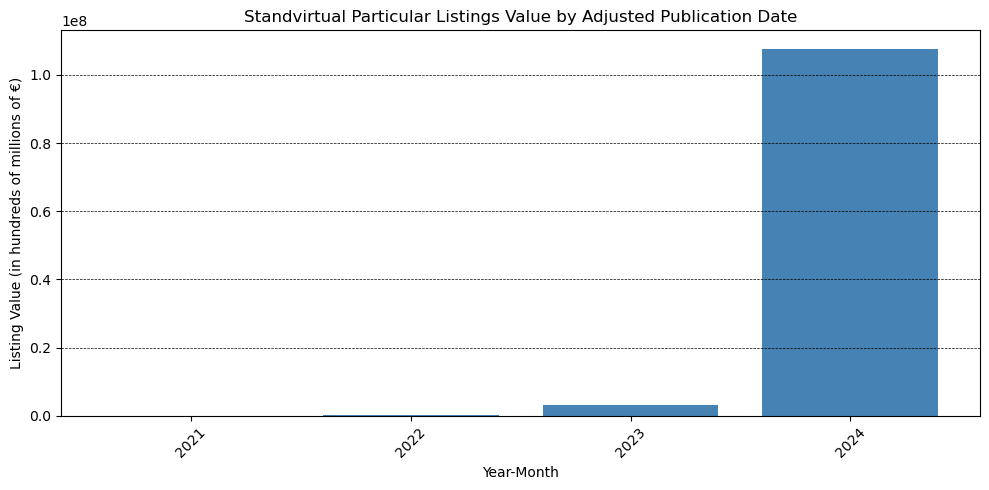

In [43]:
df2_links_table_reset = df2_links_table_.reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))

# Use formatted Year-Month for x-axis labels
plt.bar(df2_links_table_reset['Year_str'], df2_links_table_reset['Total_price'], color='#4682B4')

# Add titles and labels
plt.title('Standvirtual Particular Listings Value by Adjusted Publication Date', fontsize=12, color='black')
plt.xlabel('Year-Month', fontsize=10, color='black')
plt.ylabel('Listing Value (in hundreds of millions of €)', fontsize=10, color='black')

# Customize ticks
plt.xticks(rotation=45, color='black')  # Rotate for readability

plt.yticks(color='black')

# Add gridlines
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5)

# Ensure layout
plt.tight_layout()

# Show the plot
plt.show()


In [44]:
pd.set_option('display.width', 1000)

year_var = "2022"
df2_links___ = df2_links[df2_links["Year_str"] == year_var]
df2_links____ = df2_links___[df2_links___["Ad Type"] == "Particular"]

print(df2_links____)

               Brand                                                   Title  Kilometer  Gas Type    Gear Box  Year  Price                                                                                                               URL                          Ad Date           Ad ID  ...  URL_Data  Numeric_Position Estimated_Publication_Date Months_Per_Step  Estimated_Publication_Date_num     Adjusted_Publication_Date Year_Adjusted_Publication_Date Year_str Mont_Adjusted_Publication_Date Month_str
882              BMW                                      BMW Z4 30 i Pack M      42500  Gasolina  Automática  2024  48900                                      https://www.standvirtual.com/carros/anuncio/bmw-z4-30-i-pack-m-ID8PkPWA.html  20 de novembro de 2024 às 11:16  ID: 8087621966  ...  ID8PkPWA   157174339482956                 2022-07-30             4.0                    1.659139e+09 2022-08-14 14:13:31.636363636                           2022     2022                              8 

##### 4.1 Private/Professional Ads

In [45]:
df2_sum_ad_type = df2["Ad Type"].value_counts()
print(df2_sum_ad_type)

df2_total_ads = df2["Ad Type"].count().astype(float)
df2_professional_ads = df2[df2["Ad Type"] == "Profissional"]
df2_sum_professional_ads = df2_professional_ads["Ad Type"].count().astype(float)
percentage_professional_ads = df2_sum_professional_ads / df2_total_ads
percentage_professional_ads_formatted = f"{percentage_professional_ads:.0%}"

print(f"The percentage of professional ads is {percentage_professional_ads_formatted}")

Ad Type
Profissional    30829
Particular       5049
Name: count, dtype: int64
The percentage of professional ads is 86%


##### 4.2 Renewed Ad Estimate

In [46]:
df2_non_renewed_ads = df2[df2["Left_4_ID"].isin(['8093', '8094'])]
df2_non_renewed_ads = df2_non_renewed_ads[df2_non_renewed_ads["Month_Text"].isin(['out', 'nov'])]

df2_non_renewed_ads_sum = df2_non_renewed_ads["Brand"].count()
df2_total_sum = df2["Brand"].count()

percentage_non_renewed_ads = df2_non_renewed_ads_sum / df2_total_sum
percentage_renewed_ads = 1 - percentage_non_renewed_ads

formatted_percentage_renewed_ads = f"{percentage_renewed_ads:.2%}"
formatted_percentage_non_renewed_ads = f"{percentage_non_renewed_ads:.2%}"

print(f"According to my estimates, the percentage of non-renewed ads is {formatted_percentage_renewed_ads}")
print(f"According to my estimates, the percentage of renewed ads is {formatted_percentage_non_renewed_ads}")

According to my estimates, the percentage of non-renewed ads is 26.70%
According to my estimates, the percentage of renewed ads is 73.30%


Below is a more refined renewed ad estimated, based on the calculated Adjusted_Publication_Date

In [47]:
df2_links['Adjusted_Publication_Date'] = pd.to_datetime(df2_links['Adjusted_Publication_Date'])

# Define the cutoff date (14 days before date of scrape)
cutoff_date = pd.to_datetime('2024-11-03') 

# Filter the DataFrame to only include rows with dates after the cutoff
df2_links_non_renewed_ads_estimate = df2_links[df2_links['Adjusted_Publication_Date'] > cutoff_date]
df2_links_non_renewed_ads_estimate_sum = df2_links_non_renewed_ads_estimate['Brand'].count()

df2_links_total_ads_estimate_sum = df2_links['Brand'].count()

df2_links_non_renewed_ads_estimate_per = df2_links_non_renewed_ads_estimate_sum / df2_links_total_ads_estimate_sum
df2_links_non_renewed_ads_estimate_per_formatted = np.char.mod('%.2f%%', df2_links_non_renewed_ads_estimate_per * 100)

df2_links_renewed_ads_estimate_per = 1 - df2_links_non_renewed_ads_estimate_per
df2_links_renewed_ads_estimate_per_formatted = np.char.mod('%.2f%%', df2_links_renewed_ads_estimate_per * 100)

print(f"The percentage of non-renewed ads is {df2_links_non_renewed_ads_estimate_per_formatted}")
print(f"The percentage of renewed ads is {df2_links_renewed_ads_estimate_per_formatted}")

The percentage of non-renewed ads is 7.82%
The percentage of renewed ads is 92.18%
